## Display falsely recognized images

In [41]:
import os
import ast
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# convert data points to images
dim = (200, 200)

# datapoint to image conversion
def draw_to_img(datapoints):

    images = []
    i =0
    for data in datapoints:
        #stroke = ast.literal_eval(stroke)
        fig, ax = plt.subplots()
        
        for x,y in data:
            ax.invert_yaxis()
            ax.plot(x, y, linewidth=12)
            ax.axis('off')
        #render figure
        fig.canvas.draw()
        
        X = np.array(fig.canvas.renderer._renderer)
        plt.close("all")
        plt.clf()
        
        # resize, normalize and invert the image
        X = (cv2.resize(X, dim) / 255.)[::-1]
        # channels
        X = X[:, :, 3]
            
        print('processed {}/{}'.format(i+1,len(datapoints)),end = '\r', flush=True)
        i+=1
        plt.close(fig)
        images.append(X)
            
    print("\n")
    print ('Finished!')  
    images_conv = np.array(images)    
    return images_conv


In [43]:
# see contenst in data folder
print(os.listdir("data"))

['test_simplified.csv', 'train_simplified.zip', 'train_simplified']


In [44]:
TRAIN_PATH = "data/train_simplified/"
TEST_PATH = "data/test_simplified.csv"
SUBMISSION_NAME = 'submission.csv'

* go the each csv file in training 
* read nrwos of data from all of the csv files in the train_simplified
* set nrows to **None** to get **all** the data from **all** csv files in the train_simplified folder


In [89]:
train = pd.DataFrame()

for file in os.listdir(TRAIN_PATH)[0:1]:
    train_1 = train.append(pd.read_csv(TRAIN_PATH + file, usecols=[1, 3, 5], nrows=3000))
    
#shuffle the data
#train = shuffle(train, random_state=123)

#print class name
print(train_1['word'].values[0])

lollipop


In [90]:
train = pd.DataFrame()
for file in os.listdir(TRAIN_PATH)[1:2]:
    train_2 = train.append(pd.read_csv(TRAIN_PATH + file, usecols=[1, 3, 5], nrows=2000))

#shuffle the data
#train = shuffle(train, random_state=123)
print(train_2['word'].values[0])

bird


In [91]:
train = pd.DataFrame()
for file in os.listdir(TRAIN_PATH)[2:3]:
    train_3 = train.append(pd.read_csv(TRAIN_PATH + file, usecols=[1, 3, 5], nrows=2000))

#shuffle the data
#train = shuffle(train, random_state=123)
print(train_3['word'].values[0])

tornado


In [92]:
train = pd.DataFrame()
for file in os.listdir(TRAIN_PATH)[3:4]:
    train_4 = train.append(pd.read_csv(TRAIN_PATH + file, usecols=[1, 3, 5], nrows=2000))

#shuffle the data
#train = shuffle(train, random_state=123)
print(train_4['word'].values[0])

clock


In [93]:
train = pd.DataFrame()
for file in os.listdir(TRAIN_PATH)[4:5]:
    train_5 = train.append(pd.read_csv(TRAIN_PATH + file, usecols=[1, 3, 5], nrows=2000))

#shuffle the data
#train = shuffle(train, random_state=123)
print(train_5['word'].values[0])

rake


In [94]:
train_5.head()

,drawing,recognized,word
0,"[[[247, 231, 137, 89], [0, 18, 88, 131]], [[12...",True,rake
1,"[[[147, 145, 113, 111, 92, 21, 14, 0], [0, 9, ...",True,rake
2,"[[[0, 25, 41, 77, 92, 137, 162, 186, 205], [0,...",True,rake
3,"[[[54, 138, 233, 255], [178, 102, 25, 0]], [[2...",True,rake
4,"[[[0, 34, 165, 157, 144, 143, 147, 162, 191, 1...",True,rake


In [95]:
drawing_false_1 = []
label_1 = []
for i in range(len(train_1['drawing'])):
    #check if corresponding label is false
    if train_1['recognized'].values[i] == False:
        #append to data points list 
        drawing_false_1.append(ast.literal_eval(train_1['drawing'].values[i]))
        label_1.append(train_1['word'].values[i])

In [96]:
drawing_false_2 = []
label_2 = []
for i in range(len(train_2['drawing'])):
    #check if corresponding label is false
    if train_2['recognized'].values[i] == False:
        #append to data points list 
        drawing_false_2.append(ast.literal_eval(train_2['drawing'].values[i]))
        label_2.append(train_2['word'].values[i])

In [97]:
drawing_false_3 = []
label_3 = []
for i in range(len(train_3['drawing'])):
    #check if corresponding label is false
    if train_3['recognized'].values[i] == False:
        #append to data points list 
        drawing_false_3.append(ast.literal_eval(train_3['drawing'].values[i]))
        label_3.append(train_3['word'].values[i])

In [98]:
drawing_false_4 = []
label_4 = []
for i in range(len(train_4['drawing'])):
    #check if corresponding label is false
    if train_4['recognized'].values[i] == False:
        #append to data points list 
        drawing_false_4.append(ast.literal_eval(train_4['drawing'].values[i]))
        label_4.append(train_4['word'].values[i])

In [99]:
drawing_false_5 = []
label_5 = []
for i in range(len(train_5['drawing'])):
    #check if corresponding label is false
    if train_5['recognized'].values[i] == False:
        #append to data points list 
        drawing_false_5.append(ast.literal_eval(train_5['drawing'].values[i]))
        label_5.append(train_5['word'].values[i])

In [100]:
print(len(drawing_false_5))

286


In [101]:
false_images_1 = draw_to_img(drawing_false_1)
false_images_2 = draw_to_img(drawing_false_2)
false_images_3 = draw_to_img(drawing_false_3)

processed 116/116

Finished!
processed 341/341

Finished!
processed 67/67

Finished!


<Figure size 432x288 with 0 Axes>

In [102]:
false_images_4 = draw_to_img(drawing_false_4)

processed 30/30

Finished!


<Figure size 432x288 with 0 Axes>

In [103]:
false_images_5 = draw_to_img(drawing_false_5)

processed 286/286

Finished!


<Figure size 432x288 with 0 Axes>

Label found: lollipop


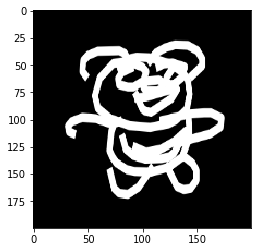

In [124]:
# try a label and its image
this = 5
plt.imshow(false_images_1[this], cmap='gray')
print('Label found:', (label_1[this]))

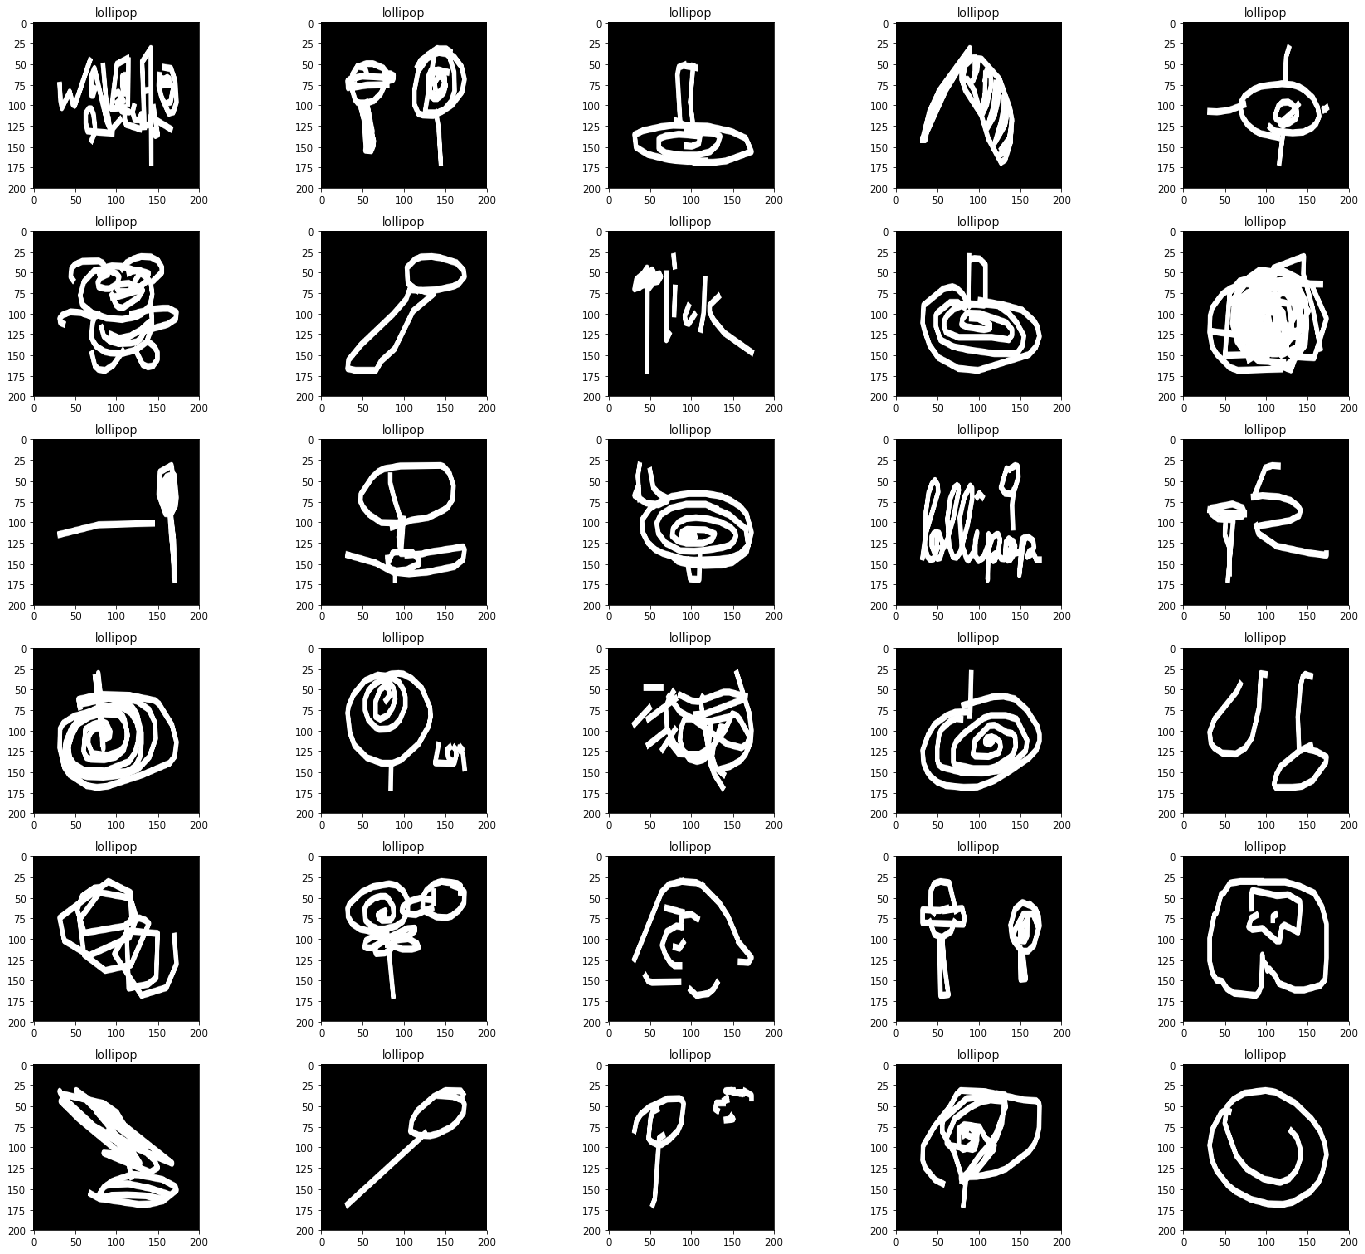

In [122]:
plt.figure(figsize=(20,20))
columns = 5

# slice between total number of false images, keep slicing between 30 images (e.g: lower = 200, upper = 230)

lower = 0
upper = 30 

for i, image in enumerate(false_images_1[lower:upper]):
    ax = plt.subplot(len(false_images_1[lower:upper]) / columns + 1, columns, i + 1)
    ax.set_title(label_1[i])
    plt.imshow(image, cmap='gray') # binary
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

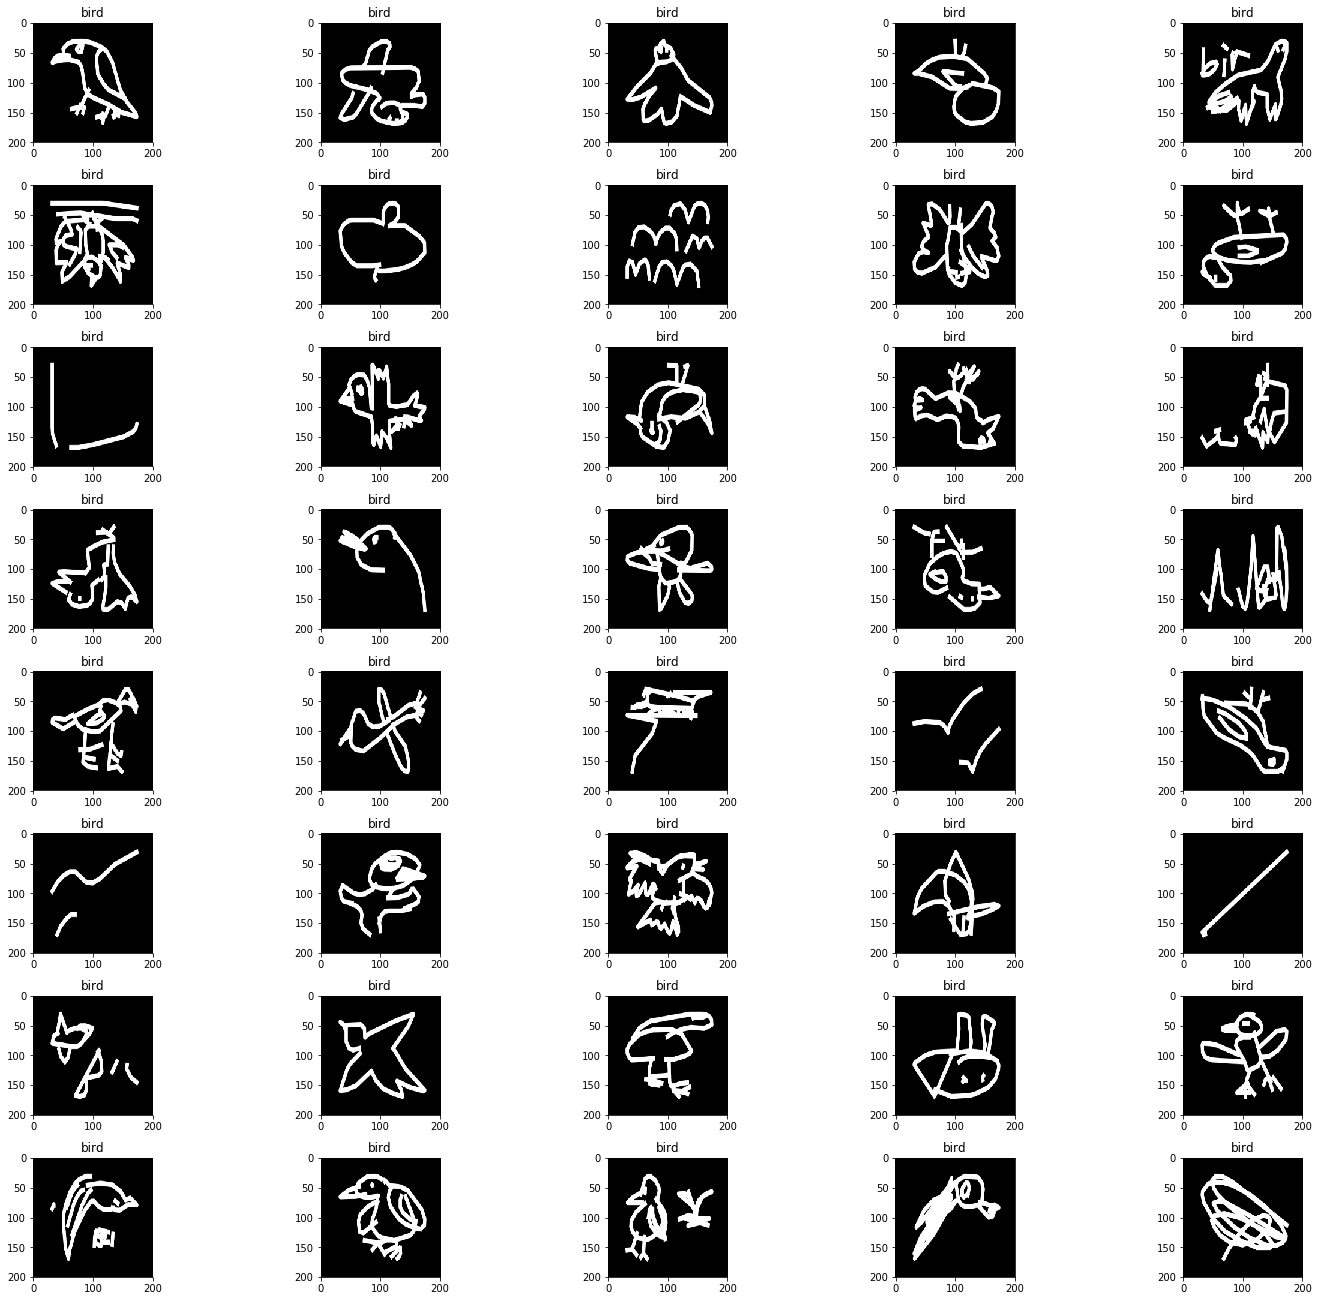

In [121]:
plt.figure(figsize=(20,20))
columns = 5


# slice between total number of false images, keep slicing between 30 images (e.g: lower = 200, upper = 230)

lower = 0
upper = 40 

for i, image in enumerate(false_images_2[lower:upper]):
    ax = plt.subplot(len(false_images_2[lower:upper]) / columns + 1, columns, i + 1)
    ax.set_title(label_2[i])
    plt.imshow(image, cmap='gray') # binary
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

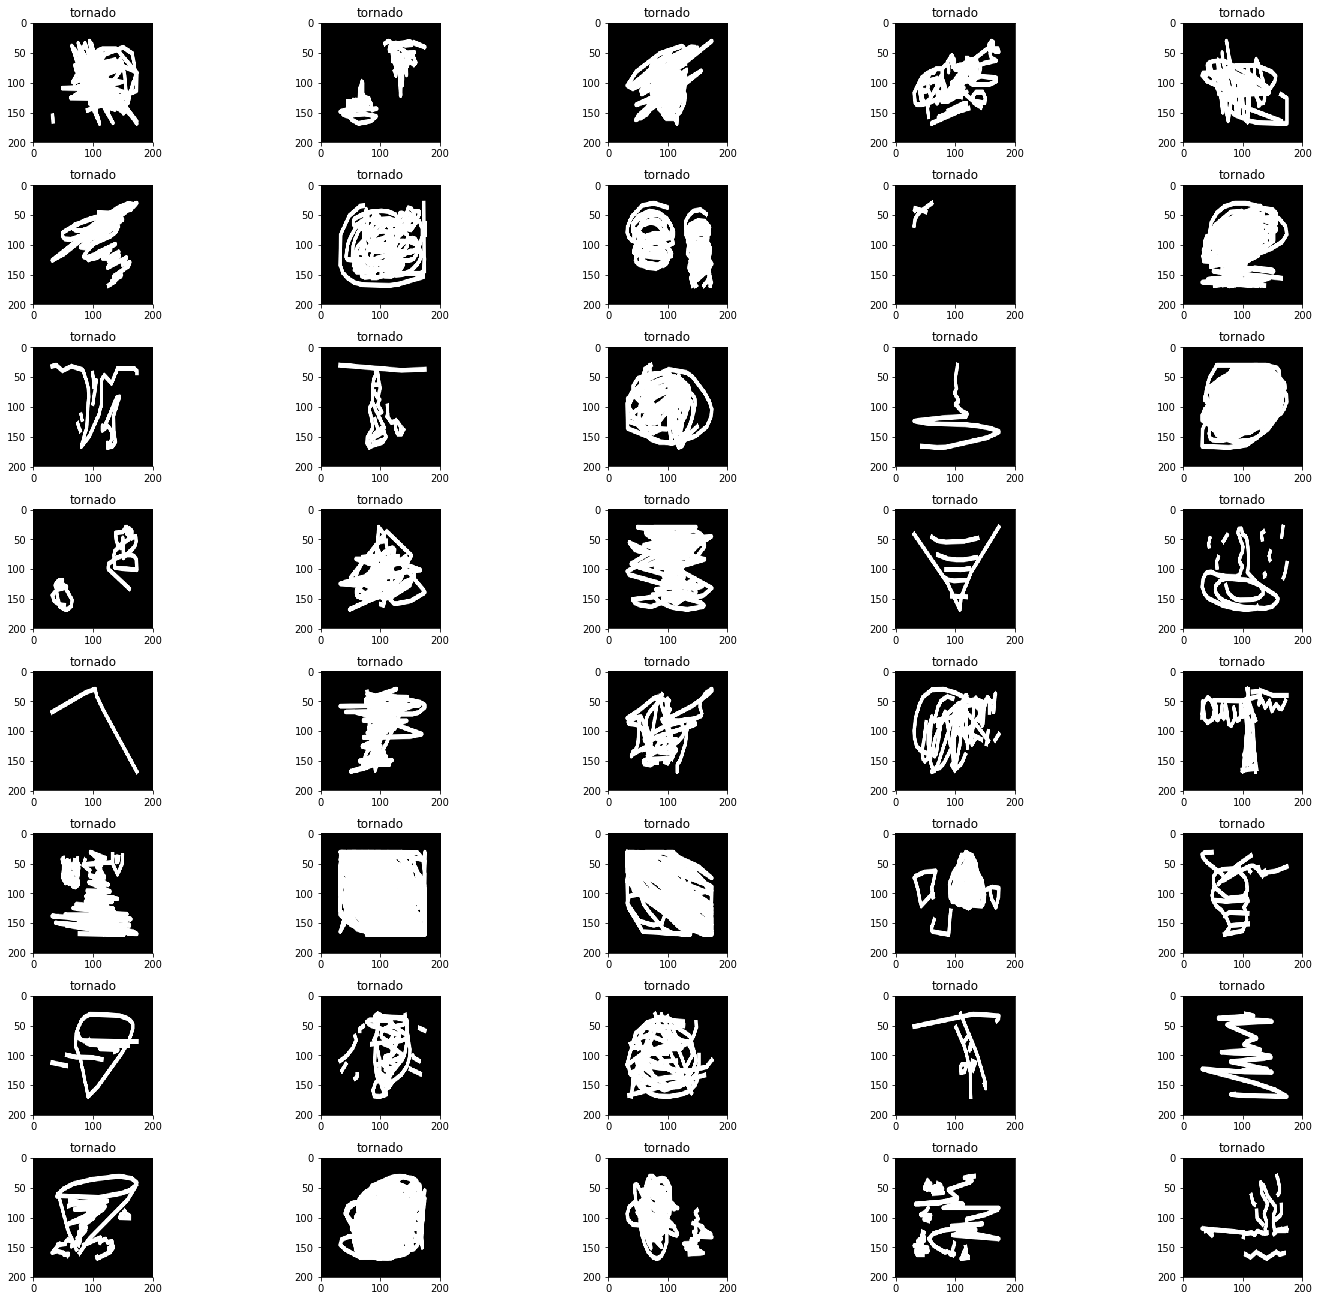

In [120]:
plt.figure(figsize=(20,20))
columns = 5


# slice between total number of false images, keep slicing between 30 images (e.g: lower = 200, upper = 230)

lower = 0
upper = 40 

for i, image in enumerate(false_images_3[lower:upper]):
    ax = plt.subplot(len(false_images_3[lower:upper]) / columns + 1, columns, i + 1)
    ax.set_title(label_3[i])
    plt.imshow(image, cmap='gray') # binary
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

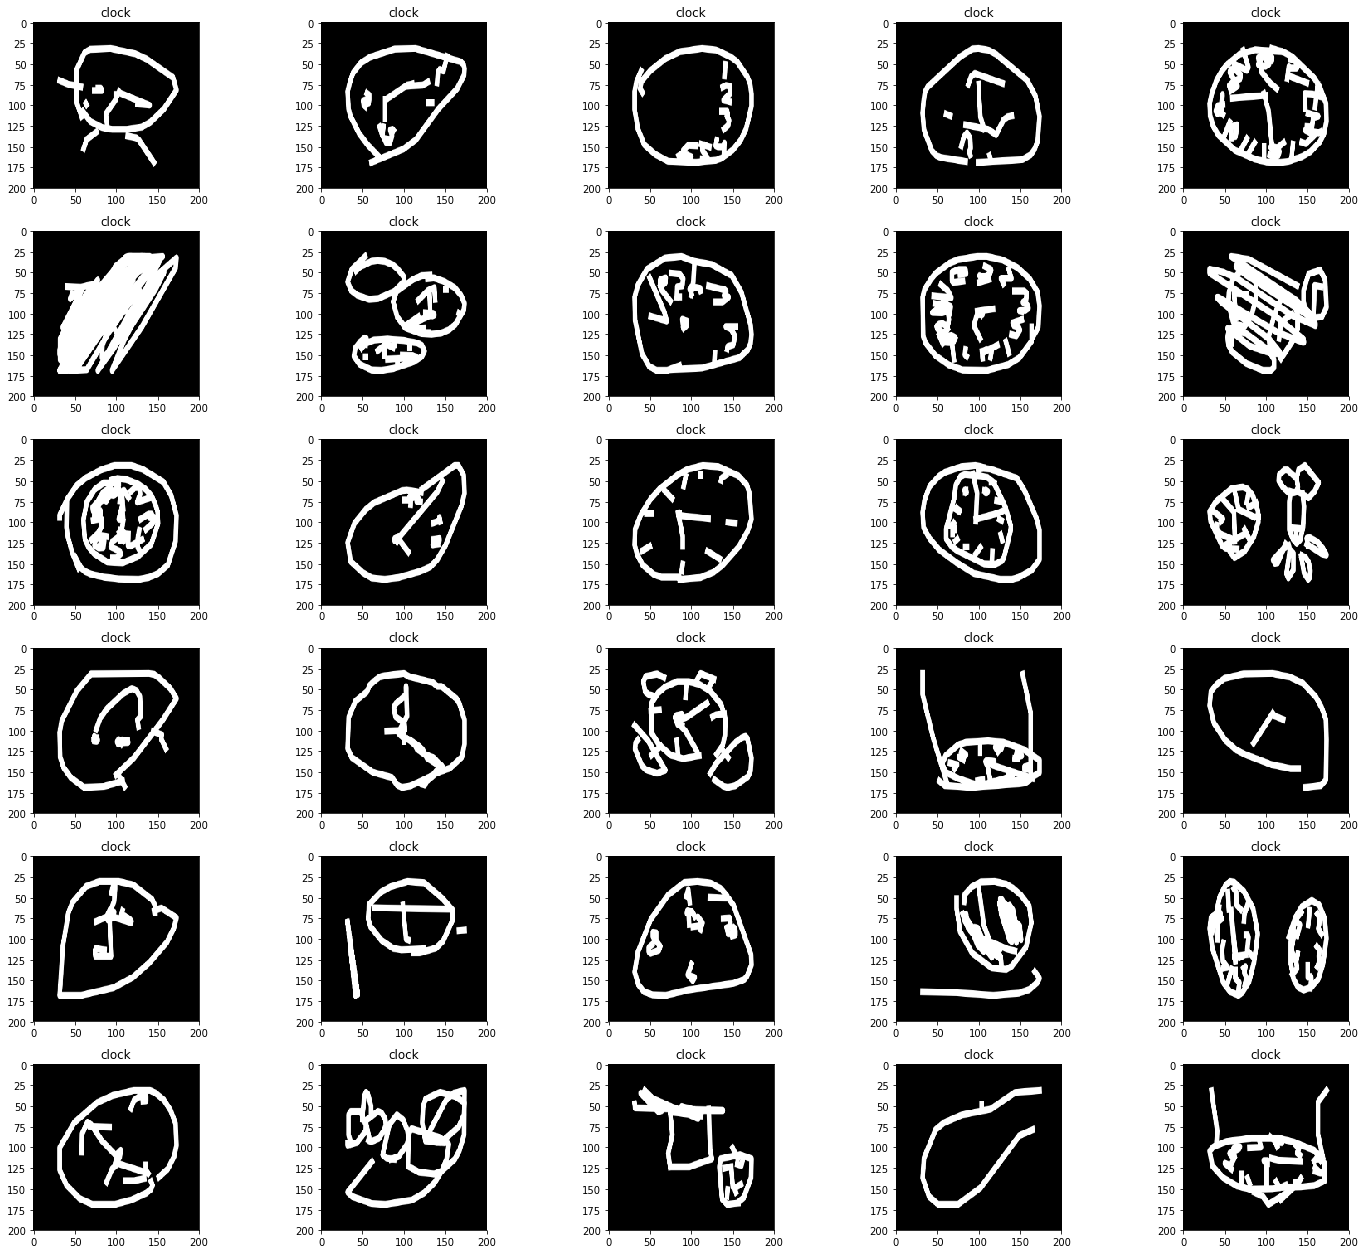

In [119]:
plt.figure(figsize=(20,20))
columns = 5


# slice between total number of false images, keep slicing between 30 images (e.g: lower = 200, upper = 230)

lower = 0
upper = 40 

for i, image in enumerate(false_images_4[lower:upper]):
    ax = plt.subplot(len(false_images_4[lower:upper]) / columns + 1, columns, i + 1)
    ax.set_title(label_4[i])
    plt.imshow(image, cmap='gray') # binary
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

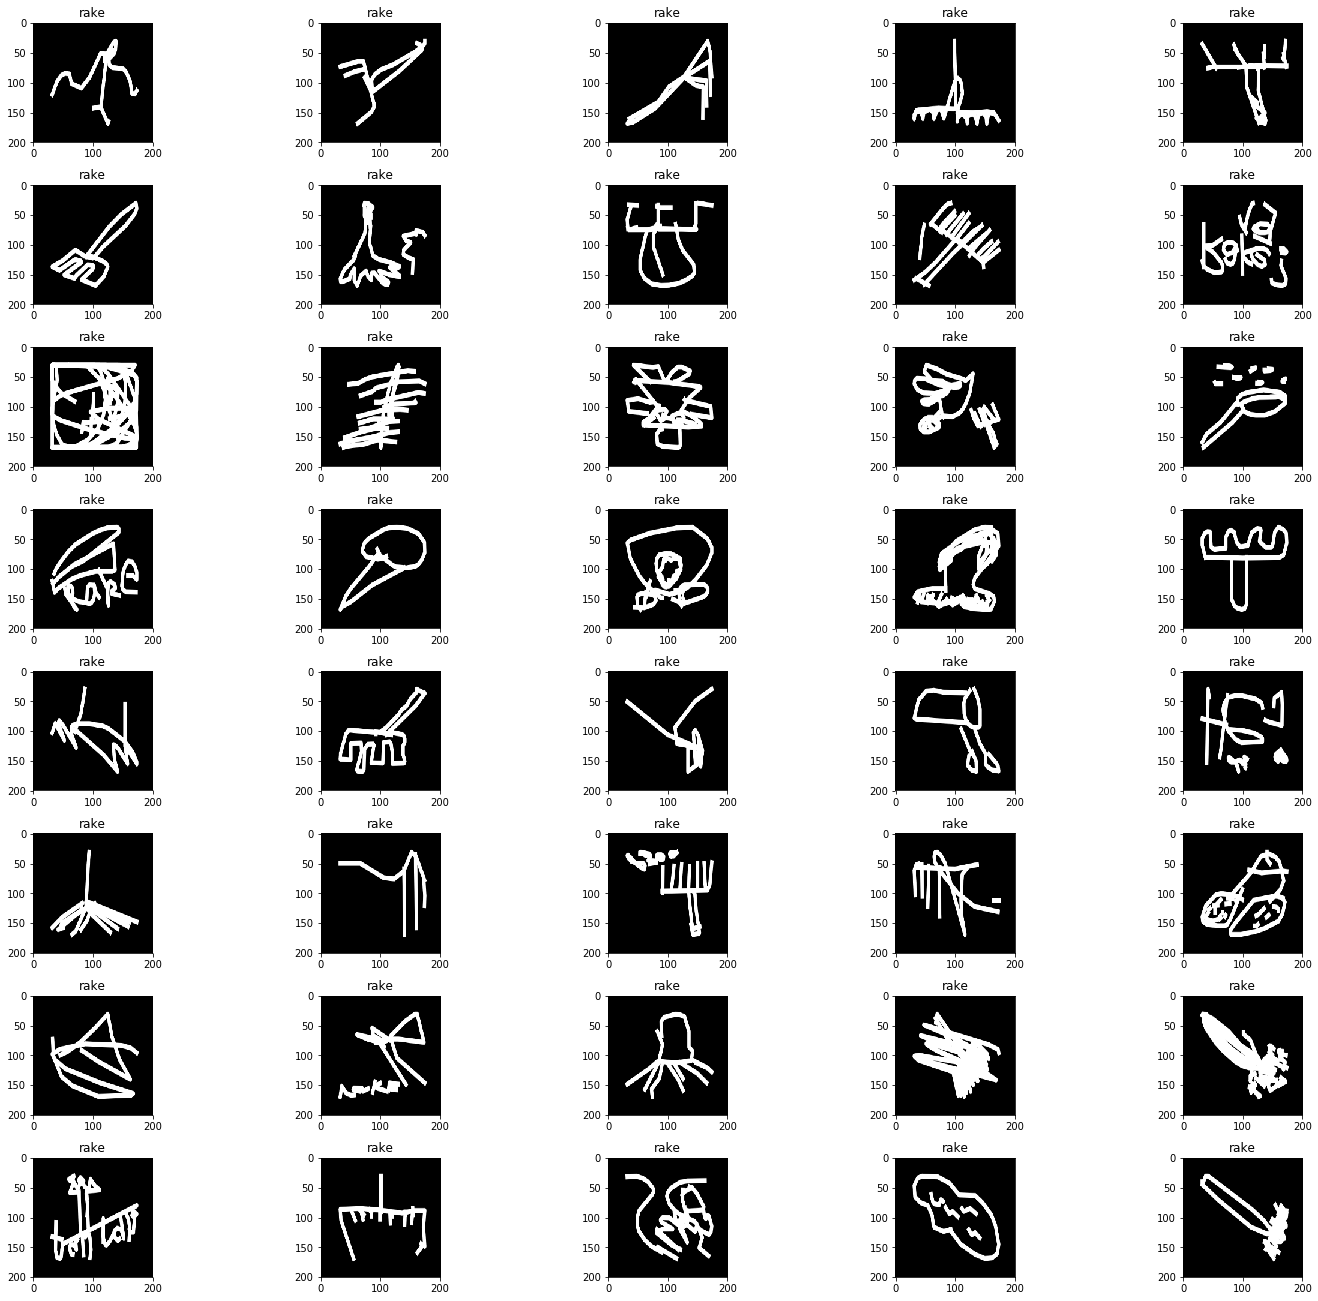

In [118]:
plt.figure(figsize=(20,20))
columns = 5


# slice between total number of false images, keep slicing between 30 images (e.g: lower = 200, upper = 230)

lower = 0
upper = 40 

for i, image in enumerate(false_images_5[lower:upper]):
    ax = plt.subplot(len(false_images_5[lower:upper]) / columns + 1, columns, i + 1)
    ax.set_title(label_5[i])
    plt.imshow(image, cmap='gray') # binary
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)